In [2]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.animation as anm
from matplotlib.animation import FuncAnimation

import numpy as np
import pandas as pd
import math

import time
from scipy.spatial.transform import Rotation

In [3]:
#data = pd.read_csv('BAUM-1/processed/S015_004.csv', sep=',+\s+')
data = pd.read_csv('RAVDESS/processed/01-01-01-01-01-01-01.csv', sep=',+\s+')

C:\Local\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
# Calculates Rotation Matrix given euler angles.
def RotationMatrix(theta) :
    
    R_x = np.array([[1,         0,                  0                   ],
                    [0,         math.cos(theta[0]), -math.sin(theta[0]) ],
                    [0,         math.sin(theta[0]), math.cos(theta[0])  ]
                    ])          
    R_y = np.array([[math.cos(theta[1]),    0,      math.sin(theta[1])  ],
                    [0,                     1,      0                   ],
                    [-math.sin(theta[1]),   0,      math.cos(theta[1])  ]
                    ])            
    R_z = np.array([[math.cos(theta[2]),    -math.sin(theta[2]),    0],
                    [math.sin(theta[2]),    math.cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])
                    
    R = np.dot(R_z, np.dot( R_y, R_x ))

    return R

In [5]:
# reconstruct rotation matrix from AMAZON Rekognition json file
def RTMatrix(rx,ry,rz,tx,ty,tz):
    r = Rotation.from_euler('xyz', [rx, ry, rz]).as_matrix()
    rt = np.concatenate([r,np.array([[tx,ty,tz]])],axis=0)
    
    return rt

<IPython.core.display.Javascript object>


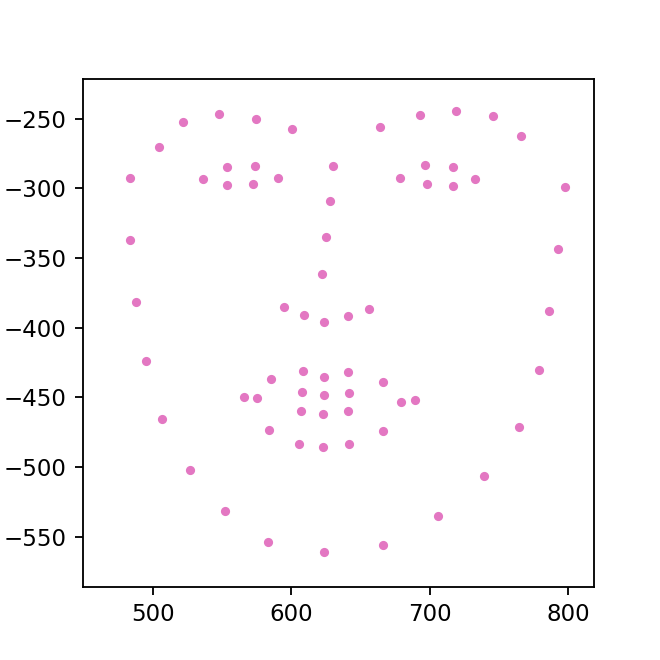

In [6]:
# show original data (without rectified)
fig, axes = plt.subplots(figsize=(4, 4))
ims = []

for f in range(len(data)):
    x = []
    y = []
    for n in range(68):
        x.append(data['x_%d'%(n)][f])
        y.append(-data['y_%d'%(n)][f])
        
#    for n in range(55):        
#        x.append(data['eye_lmk_x_%d'%(n)][f])
#        y.append(data['eye_lmk_y_%d'%(n)][f]) 
        
    im = axes.plot(x,y,'.')
    ims.append(im)
    
anim = anm.ArtistAnimation(fig, ims, interval=100)
fig.show()

<IPython.core.display.Javascript object>


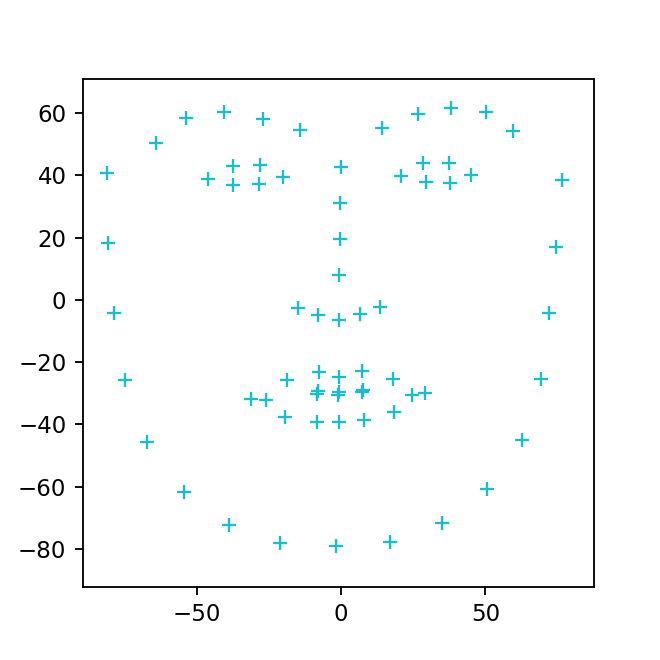

In [7]:
# show rectified data
fig, axes = plt.subplots(figsize=(4, 4))
ims = []

for f in range(len(data)):
    x = []
    y = []
    xx = []
    yy = []
    
    tx = data['pose_Tx'][f]
    ty = data['pose_Ty'][f]
    tz = data['pose_Tz'][f]
    
    rx = data['pose_Rx'][f]
    ry = data['pose_Ry'][f]
    rz = data['pose_Rz'][f]

    # rotation by lib
    R = Rotation.from_euler('XYZ', [rx,ry,rz])
   
    # rotation by ourselves
    RR = RotationMatrix([rx,ry,rz])
    RR = np.linalg.inv(RR)
    
    for n in range(68):
        #print(data['X_%d'%(n)][f],data['Y_%d'%(n)][f],data['Z_%d'%(n)][f],data['x_%d'%(n)][f], data['y_%d'%(n)][f])
        #XX = np.dot(np.array([data['X_%d'%(n)][f]-tx,data['Y_%d'%(n)][f]-ty,data['Z_%d'%(n)][f]-tz]),R)
        X = R.inv().apply(np.array([data['X_%d'%(n)][f]-tx,data['Y_%d'%(n)][f]-ty,data['Z_%d'%(n)][f]-tz]))
        XX = np.dot(RR,np.array([data['X_%d'%(n)][f]-tx,data['Y_%d'%(n)][f]-ty,data['Z_%d'%(n)][f]-tz]).T)
        
        x.append(X[0])
        y.append(-X[1])
        
        xx.append(XX[0])
        yy.append(-XX[1])
        
    im = axes.plot(x,y,'.')
    ims.append(im)
    im = axes.plot(xx,yy,'+')
    ims.append(im)
    
anim = anm.ArtistAnimation(fig, ims, interval=100)
fig.show()

<IPython.core.display.Javascript object>


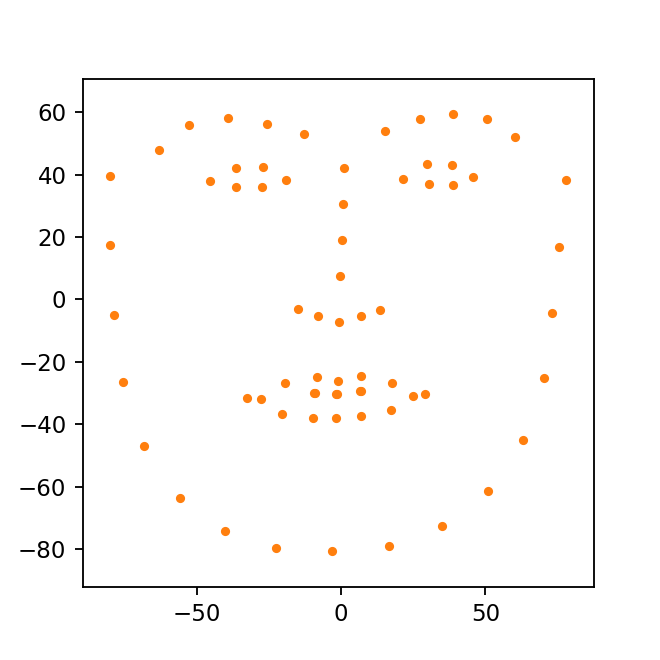

In [8]:
fig, axes = plt.subplots(figsize=(4, 4))
ims = []

for f in range(len(data)):
    x = []
    y = []
    
    tx = data['pose_Tx'][f]
    ty = data['pose_Ty'][f]
    tz = data['pose_Tz'][f]
    
    rx = data['pose_Rx'][f]
    ry = data['pose_Ry'][f]
    rz = data['pose_Rz'][f]
    
    R = RotationMatrix([rx,ry,rz])
    R = np.linalg.inv(R)

    for n in range(68):
        XX = np.dot(R,np.array([data['X_%d'%(n)][f]-tx,data['Y_%d'%(n)][f]-ty,data['Z_%d'%(n)][f]-tz]).T)
        
        x.append(XX[0])
        y.append(-XX[1])
        
    im = axes.plot(x,y,'.')
    ims.append(im)
    
anim = anm.ArtistAnimation(fig, ims, interval=100)
fig.show()